In [6]:
%matplotlib inline

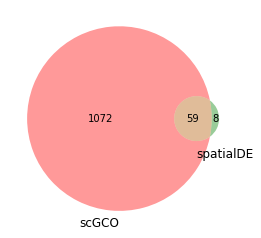

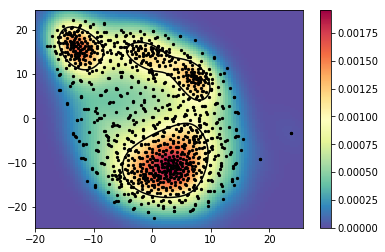

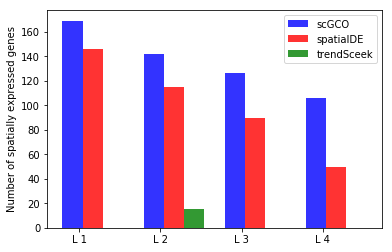

In [7]:
# generate figure 2A, 2B and 2D as shown in the manuscript
from matplotlib_venn import venn2, venn2_circles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scGCO
import os


# plot Fig. 2A
gco = 'scGCO_results/MOB_Rep11.csv'
counts_gco = pd.read_csv(gco, index_col=0)
counts_gco=counts_gco[counts_gco.fdr<0.01]
de = 'SpatialDE_results/MOB_Rep11.csv'
counts_de = pd.read_csv(de)
counts_de=counts_de[counts_de.qval<0.05]   
counts_de=counts_de[counts_de.g.values != 'log_total_count']
#ax = axes[0]
v=venn2(subsets=[set(counts_gco.index.values), 
                       set(counts_de.g.values)], 
                        set_labels = ('scGCO', 'spatialDE'))

v.set_labels[1].set_horizontalalignment('left')
v.set_labels[1].set_horizontalalignment('left')
v.set_labels[1].set_horizontalalignment('left')

plt.show()

# plot Fig. 2B
ff = 'Data/Rep11_MOB_count_matrix-1.tsv'
locs, data = scGCO.read_spatial_expression(ff)
# remove genes expressed in less than 10 cells
data = data.loc[:,(data != 0).astype(int).sum(axis=0) >= 10]
# normalize expression and use 1000 genes to test the algorithm
data_norm = scGCO.normalize_count_cellranger(data)
tsne_proj = scGCO.spatial_pca_tsne(data_norm, counts_gco.index)
zz = scGCO.visualize_tsne_density(tsne_proj)

# plot Fig. 2D
gco_brca_dict = dict()
gco_brca_sample = list()
de_brca_sample = list()
de_brca_dict = dict()
gco_brca_res=list()

for i in np.arange(4)+1: 
    oo = 'scGCO_results/BC_Layer'+str(i)+'.csv' 
    counts = pd.read_csv(oo) 
    counts=counts[counts.fdr<0.05] 
    gco_brca_res.append(counts.shape[0])
    for kk in counts.iloc[:,0].values:
        if kk in gco_brca_dict:
            gco_brca_dict[kk] = gco_brca_dict[kk] + 1
        else:
                gco_brca_dict[kk] = 1
                
de_brca_res=list()
for i in np.arange(4)+1: 
    oo = 'SpatialDE_results/BC_Layer'+str(i)+'.csv' 
    counts = pd.read_csv(oo) 
    counts=counts[counts.qval<0.05] 
    counts=counts[counts.g.values != 'log_total_count'] 
    de_brca_res.append(counts.shape[0])
    for kk in counts.g.values:
        if kk in de_brca_dict:
            de_brca_dict[kk] = de_brca_dict[kk] + 1
        else:
            de_brca_dict[kk] = 1

tre_res=list()
for i in np.arange(4)+1:

    oo='Trendsceek/results//BC_Layer'+str(i)+'.csv'
    if os.path.exists(oo):
        counts=pd.read_csv(oo)
        sig_gene=counts.shape[0]
    else:
        sig_gene=0
    tre_res.append(sig_gene)  
            
n_groups = 4
means_scGCO = gco_brca_res
means_spatialDE = de_brca_res
means_trendsceek=tre_res

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8
 
rects1 = plt.bar(index, means_scGCO, bar_width,
                 alpha=opacity,
                 color='b',
                 label='scGCO')
 
rects2 = plt.bar(index + bar_width, means_spatialDE, bar_width,
                 alpha=opacity,
                 color='r',
                 label='spatialDE')

rects3=plt.bar(index+2*bar_width,means_trendsceek,bar_width,
              alpha=opacity,
              color='g',
              label='trendSceek')
 
plt.xlabel('')
plt.ylabel('Number of spatially expressed genes')
# plt.title('Number of spatially expressed genes')
glabel = list()
for i in np.arange(4)+1:
    temp = 'L '+str(i)
    glabel.append(temp)
plt.xticks(index + bar_width/3, glabel)
plt.legend(loc='upper right')
plt.show()
# plot Fig. 1D

In [5]:
counts_gco.index

Index(['Nap1l1', 'Slc1a3', '2010300C02Rik', 'B3gat3', 'Mapre1', 'Eef1a1',
       'Sh3gl2', 'Dbn1', 'Cldn5', 'Chn2',
       ...
       'Tmbim1', 'Col11a1', 'Erdr1', 'Npc1', 'Phldb2', 'Ppp1r12c', 'Gm17066',
       'Twsg1', 'Adamts19', 'Ccnd2'],
      dtype='object', length=1131)

In [4]:
data_norm

,Nrf1,Zbtb5,Ccnl1,Lrrfip1,Bbs1,Lix1,Whrn,Ate1,Ubac1,Rab34,...,Itprip,Plcd4,Gm14322,Kcnk6,Rbm47,Snx9,Nphs2,AW549542,Snrnp35,Sspo
16.92x9.015,1.456956,1.456956,1.456956,2.913913,1.456956,2.913913,1.456956,1.456956,2.913913,1.456956,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
16.945x11.075,0.000000,0.000000,2.219628,1.479752,1.479752,5.179132,0.000000,1.479752,2.219628,1.479752,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
16.97x10.118,0.000000,2.195382,2.195382,0.000000,0.000000,0.000000,2.195382,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
16.939x12.132,1.205615,0.000000,1.205615,0.000000,4.822460,7.233691,1.205615,4.822460,3.616845,1.205615,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
16.949x13.055,0.000000,0.000000,0.000000,4.407046,0.000000,2.938031,0.000000,2.938031,5.876061,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
16.942x15.088,0.000000,0.000000,0.000000,5.847024,0.000000,1.169405,1.169405,0.000000,2.338810,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
16.941x17.065,0.000000,0.000000,1.748664,0.874332,2.622997,3.497329,0.000000,2.622997,1.748664,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
16.919x16.055,0.972479,0.972479,2.917438,0.000000,0.972479,2.917438,0.000000,3.889917,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
9.862x9.024,0.000000,0.000000,4.555417,0.000000,0.000000,9.110833,0.000000,2.277708,0.000000,4.555417,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
12.08x9.115,0.000000,0.000000,2.766307,4.149461,0.000000,2.766307,0.000000,1.383154,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
